<a href="https://colab.research.google.com/github/MansourMhz/MansourMhz/blob/main/12_16_11_19_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
dataset = pd.read_csv('/content/drive/MyDrive/MasterThesis/XAUUSD_Candlestick_1_M_BID_01.11.2021-13.11.2021(1).csv')

In [36]:
dataset.head(5)

,Gmt time,Open,High,Low,Close,Volume
0,01.11.2021 00:00:00.000,1779.948,1781.228,1779.928,1781.208,26270.0003
1,01.11.2021 00:01:00.000,1781.218,1781.928,1781.068,1781.428,22980.0008
2,01.11.2021 00:02:00.000,1781.418,1781.418,1780.978,1781.384,13179.9998
3,01.11.2021 00:03:00.000,1781.404,1782.038,1781.384,1782.028,18710.0004
4,01.11.2021 00:04:00.000,1782.018,1782.118,1781.938,1782.058,10110.0001


In [37]:
type(dataset)

pandas.core.frame.DataFrame

In [38]:
dataset.shape

(18720, 6)

In [39]:
dataset.shape[0]

18720

In [40]:
dataset.shape[1]

6

In [41]:
num_train = int(dataset.shape[0]*0.70)

In [42]:
num_train

13104

In [43]:
training_set = dataset.iloc[0:num_train,1].values

In [44]:
training_set

array([1779.948, 1781.218, 1781.418, ..., 1827.218, 1827.098, 1827.078])

In [45]:
type(training_set)

numpy.ndarray

In [46]:
training_set.shape

(13104,)

In [47]:
testing_set = dataset.iloc[num_train:,1].values

In [48]:
testing_set

array([1827.088, 1827.148, 1827.193, ..., 1864.448, 1864.448, 1864.448])

In [49]:
testing_set.shape

(5616,)

In [50]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
type(training_set)

numpy.ndarray

In [52]:
sc = MinMaxScaler(feature_range=(0,1))

In [53]:
training_set_scaled = sc.fit_transform(training_set.reshape(-1,1))

In [54]:
testing_set_scaled = sc.fit_transform(testing_set.reshape(-1,1))

In [55]:
type(training_set_scaled)

numpy.ndarray

In [56]:
timestep = 60
X_train =[]
Y_train =[]

In [57]:
len(training_set)

13104

In [58]:
for i in range(timestep,len(training_set)):
    X_train.append(training_set_scaled[i-timestep:i,0])
    Y_train.append(training_set_scaled[i,0])

In [59]:
type(X_train)

x_train = np.array(X_train)

x_train = np.array(X_train)
y_train = np.array(Y_train)

In [60]:
type(y_train)

numpy.ndarray

In [61]:
y_train.shape
x_train.shape

(13044, 60)

In [62]:
X_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))

In [63]:
X_train.shape

(13044, 60, 1)

In [64]:
Y_train = np.reshape(y_train,(y_train.shape[0],1))

In [65]:
Y_train.shape

(13044, 1)

In [66]:
X_test = []
Y_test =[]

In [67]:
for i in range(timestep,len(testing_set)):
    X_test.append(testing_set_scaled[i-timestep:i,0])
    Y_test.append(testing_set_scaled[i,0])

In [68]:
x_test = np.array(X_test)
y_test = np.array(Y_test)
X_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))
Y_test = np.reshape(y_test,(y_test.shape[0],1))

In [70]:
X_train

array([[[0.2747071 ],
        [0.29221227],
        [0.29496899],
        ...,
        [0.30379049],
        [0.29560303],
        [0.29620951]],

       [[0.29221227],
        [0.29496899],
        [0.29477602],
        ...,
        [0.29560303],
        [0.29620951],
        [0.29643005]],

       [[0.29496899],
        [0.29477602],
        [0.30323915],
        ...,
        [0.29620951],
        [0.29643005],
        [0.29400414]],

       ...,

       [[0.94376292],
        [0.94665748],
        [0.94996554],
        ...,
        [0.92618884],
        [0.92439697],
        [0.92425913]],

       [[0.94665748],
        [0.94996554],
        [0.95217092],
        ...,
        [0.92439697],
        [0.92425913],
        [0.92625775]],

       [[0.94996554],
        [0.95217092],
        [0.95237767],
        ...,
        [0.92425913],
        [0.92625775],
        [0.92460372]]])

In [71]:
x_train = torch.from_numpy(X_train).type(torch.Tensor)

In [72]:
type(x_train)

torch.Tensor

In [74]:
y_train = torch.from_numpy(Y_train).type(torch.Tensor)
x_test = torch.from_numpy(X_test).type(torch.Tensor)
y_test = torch.from_numpy(Y_test).type(torch.Tensor)

In [75]:
x_train

tensor([[[0.2747],
         [0.2922],
         [0.2950],
         ...,
         [0.3038],
         [0.2956],
         [0.2962]],

        [[0.2922],
         [0.2950],
         [0.2948],
         ...,
         [0.2956],
         [0.2962],
         [0.2964]],

        [[0.2950],
         [0.2948],
         [0.3032],
         ...,
         [0.2962],
         [0.2964],
         [0.2940]],

        ...,

        [[0.9438],
         [0.9467],
         [0.9500],
         ...,
         [0.9262],
         [0.9244],
         [0.9243]],

        [[0.9467],
         [0.9500],
         [0.9522],
         ...,
         [0.9244],
         [0.9243],
         [0.9263]],

        [[0.9500],
         [0.9522],
         [0.9524],
         ...,
         [0.9243],
         [0.9263],
         [0.9246]]])

In [76]:
y_train

tensor([[0.2964],
        [0.2940],
        [0.2801],
        ...,
        [0.9263],
        [0.9246],
        [0.9243]])

In [77]:
input_dim = 1 # day
hidden_dim = 32 #
num_layers = 2
output_dim = 1

In [78]:
class MyLSTM(torch.nn.Module):

    def __init__(self, input_dim, hidden_dim, num_layers,output_dim):
        super(MyLSTM,self).__init__()

        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        self.lstm = torch.nn.LSTM(input_dim, hidden_dim,num_layers, batch_first = True) #1 -- 32

        self.fc = torch.nn.Linear(hidden_dim, output_dim) #32 --- 1

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()   
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn, cn) = self.lstm (x, (h0.detach(),c0.detach()))
        out = self.fc(out[:,-1,:])

        return out

In [79]:
model = MyLSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)

model

loss_fn = torch.nn.MSELoss()

params=model.parameters()
optimizer = torch.optim.Adam(params, lr=0.01)

#train model

num_epoch = 100
listLoss = np.zeros(num_epoch)

In [80]:
for t in range(num_epoch):

    y_train_pred = model(x_train) # forward inputs
    loss = loss_fn(y_train_pred , y_train) #loss
    listLoss[t] = loss.item() #save loss in list
    #print("epoch:",t,  "loss", loss.item()) #print lossepoch
    optimizer.zero_grad() #
    loss.backward() #
    optimizer.step() # update

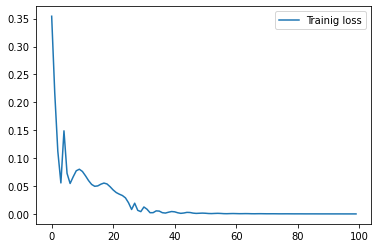

In [81]:
plt.plot(listLoss, label ="Trainig loss")
plt.legend()
plt.show()

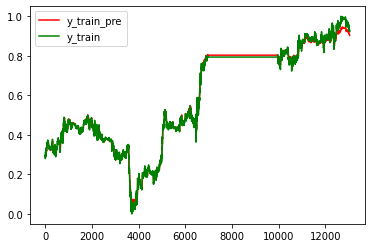

In [82]:
plt.plot(y_train_pred.detach().numpy(), label ="y_train_pre", color ='red')
plt.plot(y_train.detach().numpy(), label ="y_train", color ='green')
plt.legend()
plt.show()

In [85]:
from sklearn.metrics import accuracy_score, r2_score

In [86]:
r2_score = r2_score(y_train.detach().numpy(), y_train_pred.detach().numpy())

In [87]:
r2_score

0.9967608217111508

In [88]:
y_test_pred = model(x_test)

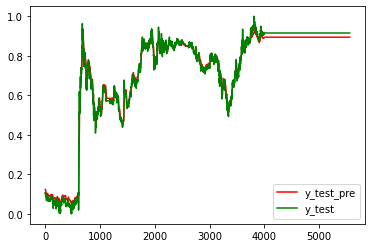

In [89]:
plt.plot(y_test_pred.detach().numpy(), label ="y_test_pre", color ='red')
plt.plot(y_test.detach().numpy(), label ="y_test", color ='green')
plt.legend()
plt.show()

In [90]:
y_test.shape

torch.Size([5556, 1])

In [91]:
y_test_pred.shape

torch.Size([5556, 1])

In [92]:
r2_score

0.9967608217111508

In [93]:
y_test.shape

torch.Size([5556, 1])

In [94]:
y_test.shape

torch.Size([5556, 1])

In [95]:
y_test_pred.shape

torch.Size([5556, 1])